In [1]:
import pandas as pd
import numpy as np
import my_functions as mf
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
np.random.seed(22)
import sys
def loading_bar(progress, total, length=30):
    percent = int(100 * progress / total)
    filled = int(length * progress / total)
    bar = '█' * filled + '-' * (length - filled)
    sys.stdout.write(f'\rRunning Simulations: |{bar}| {percent}% --- {progress}/{total}')
    sys.stdout.flush()

T_list = []
num_series_list = []
coint_frac_list = []
num_of_rw_list = []
SADF_mean_list = []
SADF_median_list = []
SADF_min_list = []
SADF_max_list = []
SADF_std_list = []
SADF_p25_list = []
SADF_p75_list = []
SADF_p95_list = []
SADF_p99_list = []
crit_95_list = []
crit_99_list = []
power_list = []
delta_list = []

In [2]:
num_series = 5
z = mf.random_walk(1000).reshape(-1, 1) #constant
eps = np.random.normal(0, 1, size=(1000, num_series)) # DEPENDS on T
et = np.random.normal(0, 1, size=(1000, num_series)) #constant

B = 2500

multipliers = mf.unique_rounded_uniform(1, 2, num_series, decimals=5) #constant

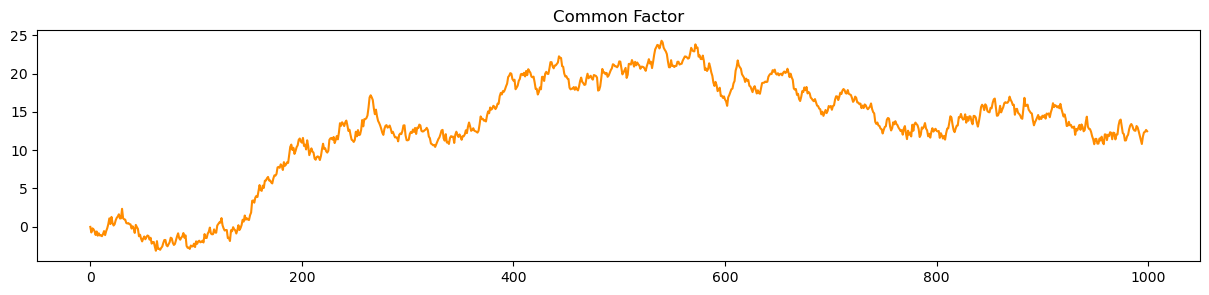

In [5]:
plt.figure(figsize=(15, 3))
plt.plot(z, color = "darkorange")
plt.title("Common Factor")
plt.show()

In [7]:
num_of_rw = 0.6
T = 800
e = eps[:T,:].copy()
common_fac = z[:T].copy()
coint_frac = 0.4

Running Simulations: |██████████████████████████████| 100% --- 2500/2500

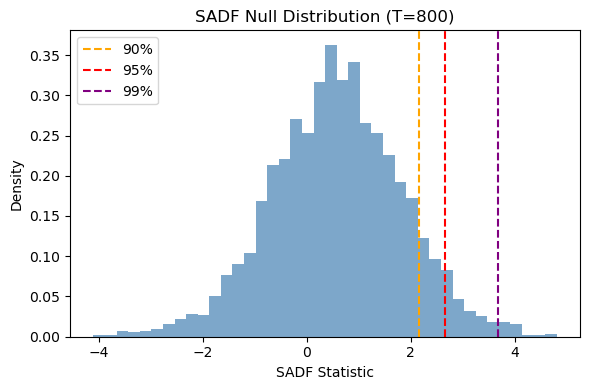

     Critical Value
90%        2.164548
95%        2.653936
99%        3.667609


In [5]:
crit_val = mf.simulate_sadf_distribution(B=B, T=T, num_series=num_series, coint_frac=coint_frac, num_of_rw=num_of_rw, multi = multipliers, common_fac = common_fac, e = e)
print(crit_val)
crit_val_95 =  np.round(crit_val.loc["95%", "Critical Value"],3)
crit_val_99 =  np.round(crit_val.loc["99%", "Critical Value"],3)

## Positive

In [7]:
innov = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

Mean SADF: 20.42
Median SADF: 22.689
Min SADF: -1.64
Max SADF: 26.204
Standard deviation: 5.694
25th percentile: 19.694
75th percentile: 23.841
95th percentile: 24.846
99th percentile: 25.608


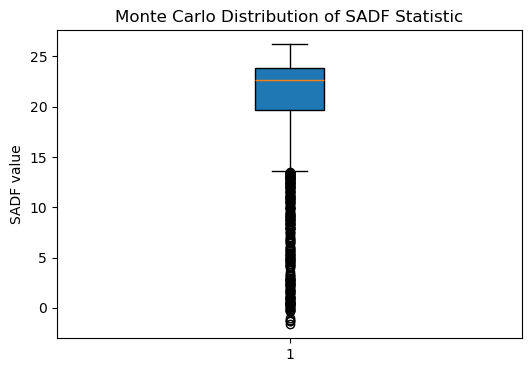

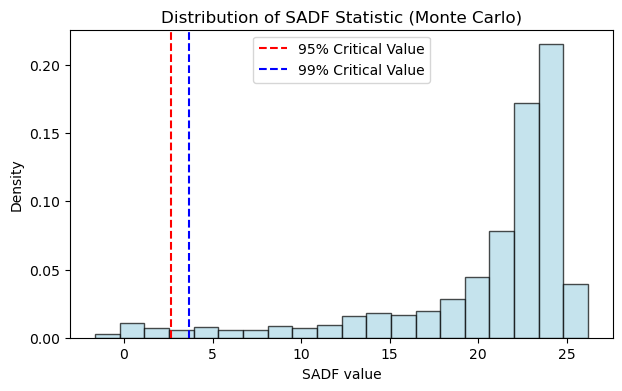

Empirical power at this setting: 0.97


In [8]:
delta = 0.01

""" Run Experiment """
sadf_list = []
B = 2000
for i in range(B):
    innov = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
    sadf_val = mf.run_sadf_bubble_check_2( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
    sadf_list.append(sadf_val)
    loading_bar(i + 1, B)

sadf_array = np.array(sadf_list)
print("\n")
print("Mean SADF:", np.round(np.mean(sadf_array), 3))
print("Median SADF:", np.round(np.median(sadf_array), 3))
print("Min SADF:", np.round(np.min(sadf_array), 3))
print("Max SADF:", np.round(np.max(sadf_array), 3))
print("Standard deviation:", np.round(np.std(sadf_array), 3))
print("25th percentile:", np.round(np.percentile(sadf_array, 25), 3))
print("75th percentile:", np.round(np.percentile(sadf_array, 75), 3))
print("95th percentile:", np.round(np.percentile(sadf_array, 95), 3))
print("99th percentile:", np.round(np.percentile(sadf_array, 99), 3))

plt.figure(figsize=(6,4))
plt.boxplot(sadf_array, vert=True, patch_artist=True)
plt.title("Monte Carlo Distribution of SADF Statistic")
plt.ylabel("SADF value")
plt.show()

plt.figure(figsize=(7,4))
plt.hist(sadf_array, bins=20, color='lightblue', edgecolor='k', alpha=0.7, density=True)
plt.axvline(crit_val_95, color='red', linestyle='--', label='95% Critical Value')
plt.axvline(crit_val_99, color='blue', linestyle='--', label='99% Critical Value')
plt.title("Distribution of SADF Statistic (Monte Carlo)")
plt.xlabel("SADF value")
plt.ylabel("Density")
plt.legend()
plt.show()

power = np.mean(sadf_array > crit_val_95)
print("Empirical power at this setting:", np.round(power, 3))

mean_val   = np.round(np.mean(sadf_array), 3)
median_val = np.round(np.median(sadf_array), 3)
min_val    = np.round(np.min(sadf_array), 3)
max_val    = np.round(np.max(sadf_array), 3)
std_val    = np.round(np.std(sadf_array), 3)
p25_val    = np.round(np.percentile(sadf_array, 25), 3)
p75_val    = np.round(np.percentile(sadf_array, 75), 3)
p95_val    = np.round(np.percentile(sadf_array, 95), 3)
p99_val    = np.round(np.percentile(sadf_array, 99), 3)

SADF_mean_list.append(mean_val)
SADF_median_list.append(median_val)
SADF_min_list.append(min_val)
SADF_max_list.append(max_val)
SADF_std_list.append(std_val)
SADF_p25_list.append(p25_val)
SADF_p75_list.append(p75_val)
SADF_p95_list.append(p95_val)
SADF_p99_list.append(p99_val)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)
power_list.append(power)
delta_list.append(delta)

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

Mean SADF: 22.949
Median SADF: 24.045
Min SADF: -1.182
Max SADF: 26.831
Standard deviation: 4.039
25th percentile: 23.225
75th percentile: 24.66
95th percentile: 25.491
99th percentile: 25.917


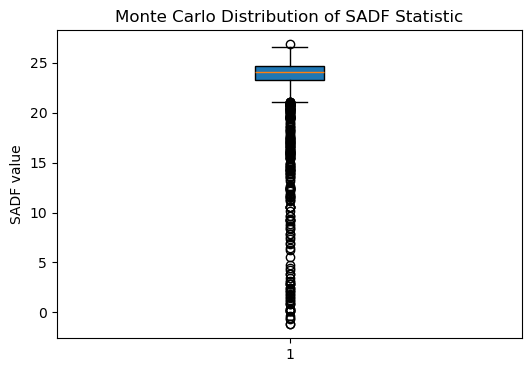

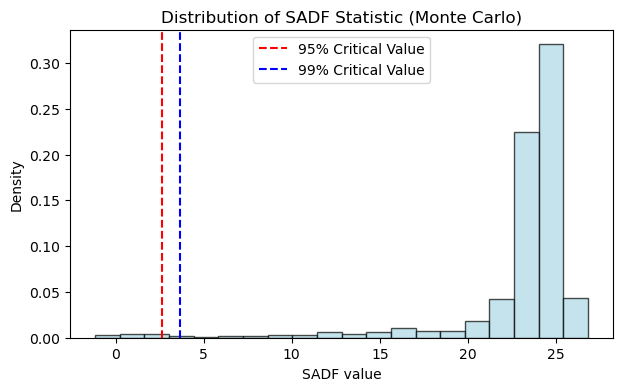

Empirical power at this setting: 0.988


In [9]:
delta = 0.012
""" Run Experiment """
sadf_list = []
B = 2000
for i in range(B):
    innov = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
    sadf_val = mf.run_sadf_bubble_check_2( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
    sadf_list.append(sadf_val)
    loading_bar(i + 1, B)

sadf_array = np.array(sadf_list)
print("\n")
print("Mean SADF:", np.round(np.mean(sadf_array), 3))
print("Median SADF:", np.round(np.median(sadf_array), 3))
print("Min SADF:", np.round(np.min(sadf_array), 3))
print("Max SADF:", np.round(np.max(sadf_array), 3))
print("Standard deviation:", np.round(np.std(sadf_array), 3))
print("25th percentile:", np.round(np.percentile(sadf_array, 25), 3))
print("75th percentile:", np.round(np.percentile(sadf_array, 75), 3))
print("95th percentile:", np.round(np.percentile(sadf_array, 95), 3))
print("99th percentile:", np.round(np.percentile(sadf_array, 99), 3))

plt.figure(figsize=(6,4))
plt.boxplot(sadf_array, vert=True, patch_artist=True)
plt.title("Monte Carlo Distribution of SADF Statistic")
plt.ylabel("SADF value")
plt.show()

plt.figure(figsize=(7,4))
plt.hist(sadf_array, bins=20, color='lightblue', edgecolor='k', alpha=0.7, density=True)
plt.axvline(crit_val_95, color='red', linestyle='--', label='95% Critical Value')
plt.axvline(crit_val_99, color='blue', linestyle='--', label='99% Critical Value')
plt.title("Distribution of SADF Statistic (Monte Carlo)")
plt.xlabel("SADF value")
plt.ylabel("Density")
plt.legend()
plt.show()

power = np.mean(sadf_array > crit_val_95)
print("Empirical power at this setting:", np.round(power, 3))

mean_val   = np.round(np.mean(sadf_array), 3)
median_val = np.round(np.median(sadf_array), 3)
min_val    = np.round(np.min(sadf_array), 3)
max_val    = np.round(np.max(sadf_array), 3)
std_val    = np.round(np.std(sadf_array), 3)
p25_val    = np.round(np.percentile(sadf_array, 25), 3)
p75_val    = np.round(np.percentile(sadf_array, 75), 3)
p95_val    = np.round(np.percentile(sadf_array, 95), 3)
p99_val    = np.round(np.percentile(sadf_array, 99), 3)

SADF_mean_list.append(mean_val)
SADF_median_list.append(median_val)
SADF_min_list.append(min_val)
SADF_max_list.append(max_val)
SADF_std_list.append(std_val)
SADF_p25_list.append(p25_val)
SADF_p75_list.append(p75_val)
SADF_p95_list.append(p95_val)
SADF_p99_list.append(p99_val)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)
delta_list.append(delta)
power_list.append(power)

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

Mean SADF: 23.289
Median SADF: 24.136
Min SADF: -1.993
Max SADF: 26.7
Standard deviation: 3.654
25th percentile: 23.415
75th percentile: 24.751
95th percentile: 25.511
99th percentile: 26.15


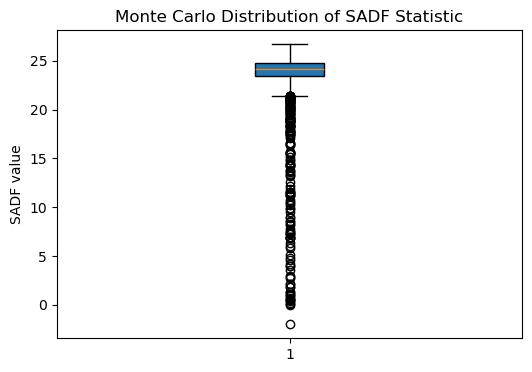

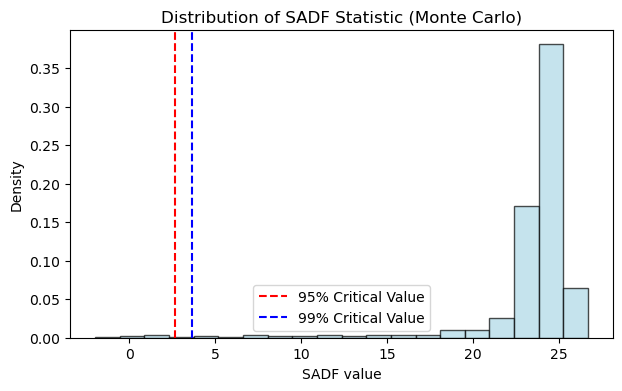

Empirical power at this setting: 0.991


In [10]:
delta = 0.0125
""" Run Experiment """
sadf_list = []
B = 2000
for i in range(B):
    innov = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
    sadf_val = mf.run_sadf_bubble_check_2( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
    sadf_list.append(sadf_val)
    loading_bar(i + 1, B)

sadf_array = np.array(sadf_list)
print("\n")
print("Mean SADF:", np.round(np.mean(sadf_array), 3))
print("Median SADF:", np.round(np.median(sadf_array), 3))
print("Min SADF:", np.round(np.min(sadf_array), 3))
print("Max SADF:", np.round(np.max(sadf_array), 3))
print("Standard deviation:", np.round(np.std(sadf_array), 3))
print("25th percentile:", np.round(np.percentile(sadf_array, 25), 3))
print("75th percentile:", np.round(np.percentile(sadf_array, 75), 3))
print("95th percentile:", np.round(np.percentile(sadf_array, 95), 3))
print("99th percentile:", np.round(np.percentile(sadf_array, 99), 3))

plt.figure(figsize=(6,4))
plt.boxplot(sadf_array, vert=True, patch_artist=True)
plt.title("Monte Carlo Distribution of SADF Statistic")
plt.ylabel("SADF value")
plt.show()

plt.figure(figsize=(7,4))
plt.hist(sadf_array, bins=20, color='lightblue', edgecolor='k', alpha=0.7, density=True)
plt.axvline(crit_val_95, color='red', linestyle='--', label='95% Critical Value')
plt.axvline(crit_val_99, color='blue', linestyle='--', label='99% Critical Value')
plt.title("Distribution of SADF Statistic (Monte Carlo)")
plt.xlabel("SADF value")
plt.ylabel("Density")
plt.legend()
plt.show()

power = np.mean(sadf_array > crit_val_95)
print("Empirical power at this setting:", np.round(power, 3))

mean_val   = np.round(np.mean(sadf_array), 3)
median_val = np.round(np.median(sadf_array), 3)
min_val    = np.round(np.min(sadf_array), 3)
max_val    = np.round(np.max(sadf_array), 3)
std_val    = np.round(np.std(sadf_array), 3)
p25_val    = np.round(np.percentile(sadf_array, 25), 3)
p75_val    = np.round(np.percentile(sadf_array, 75), 3)
p95_val    = np.round(np.percentile(sadf_array, 95), 3)
p99_val    = np.round(np.percentile(sadf_array, 99), 3)

SADF_mean_list.append(mean_val)
SADF_median_list.append(median_val)
SADF_min_list.append(min_val)
SADF_max_list.append(max_val)
SADF_std_list.append(std_val)
SADF_p25_list.append(p25_val)
SADF_p75_list.append(p75_val)
SADF_p95_list.append(p95_val)
delta_list.append(delta)
SADF_p99_list.append(p99_val)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)
power_list.append(power)

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

Mean SADF: 23.535
Median SADF: 24.226
Min SADF: -0.664
Max SADF: 26.922
Standard deviation: 3.288
25th percentile: 23.539
75th percentile: 24.815
95th percentile: 25.665
99th percentile: 26.225


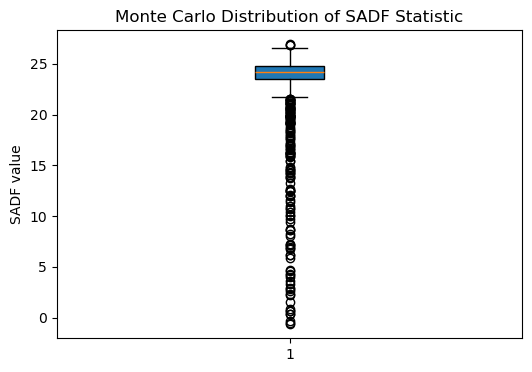

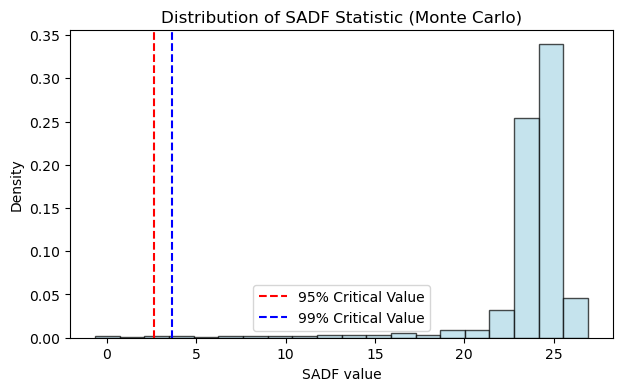

Empirical power at this setting: 0.994


In [11]:
delta = 0.013
""" Run Experiment """
sadf_list = []
B = 2000
for i in range(B):
    innov = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
    sadf_val = mf.run_sadf_bubble_check_2( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
    sadf_list.append(sadf_val)
    loading_bar(i + 1, B)

sadf_array = np.array(sadf_list)
print("\n")
print("Mean SADF:", np.round(np.mean(sadf_array), 3))
print("Median SADF:", np.round(np.median(sadf_array), 3))
print("Min SADF:", np.round(np.min(sadf_array), 3))
print("Max SADF:", np.round(np.max(sadf_array), 3))
print("Standard deviation:", np.round(np.std(sadf_array), 3))
print("25th percentile:", np.round(np.percentile(sadf_array, 25), 3))
print("75th percentile:", np.round(np.percentile(sadf_array, 75), 3))
print("95th percentile:", np.round(np.percentile(sadf_array, 95), 3))
print("99th percentile:", np.round(np.percentile(sadf_array, 99), 3))

plt.figure(figsize=(6,4))
plt.boxplot(sadf_array, vert=True, patch_artist=True)
plt.title("Monte Carlo Distribution of SADF Statistic")
plt.ylabel("SADF value")
plt.show()

plt.figure(figsize=(7,4))
plt.hist(sadf_array, bins=20, color='lightblue', edgecolor='k', alpha=0.7, density=True)
plt.axvline(crit_val_95, color='red', linestyle='--', label='95% Critical Value')
plt.axvline(crit_val_99, color='blue', linestyle='--', label='99% Critical Value')
plt.title("Distribution of SADF Statistic (Monte Carlo)")
plt.xlabel("SADF value")
plt.ylabel("Density")
plt.legend()
plt.show()

power = np.mean(sadf_array > crit_val_95)
print("Empirical power at this setting:", np.round(power, 3))

mean_val   = np.round(np.mean(sadf_array), 3)
median_val = np.round(np.median(sadf_array), 3)
min_val    = np.round(np.min(sadf_array), 3)
max_val    = np.round(np.max(sadf_array), 3)
std_val    = np.round(np.std(sadf_array), 3)
p25_val    = np.round(np.percentile(sadf_array, 25), 3)
p75_val    = np.round(np.percentile(sadf_array, 75), 3)
p95_val    = np.round(np.percentile(sadf_array, 95), 3)
p99_val    = np.round(np.percentile(sadf_array, 99), 3)

SADF_mean_list.append(mean_val)
SADF_median_list.append(median_val)
SADF_min_list.append(min_val)
SADF_max_list.append(max_val)
SADF_std_list.append(std_val)
SADF_p25_list.append(p25_val)
SADF_p75_list.append(p75_val)
SADF_p95_list.append(p95_val)
SADF_p99_list.append(p99_val)
delta_list.append(delta)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)
power_list.append(power)

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

Mean SADF: 24.14
Median SADF: 24.38
Min SADF: -0.423
Max SADF: 26.975
Standard deviation: 1.964
25th percentile: 23.829
75th percentile: 24.879
95th percentile: 25.637
99th percentile: 26.102


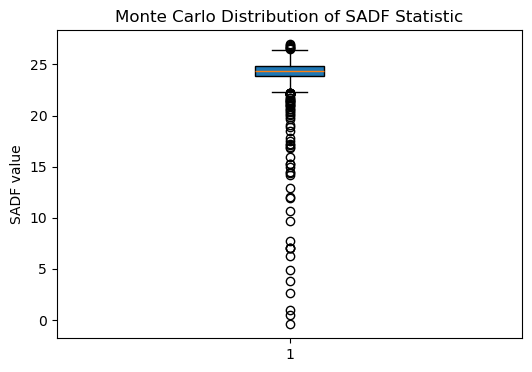

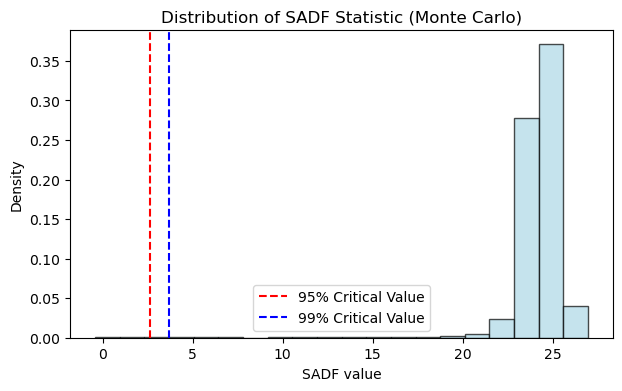

Empirical power at this setting: 0.998


In [12]:
delta = 0.015
""" Run Experiment """
sadf_list = []
B = 2000
for i in range(B):
    innov = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
    sadf_val = mf.run_sadf_bubble_check_2( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
    sadf_list.append(sadf_val)
    loading_bar(i + 1, B)

sadf_array = np.array(sadf_list)
print("\n")
print("Mean SADF:", np.round(np.mean(sadf_array), 3))
print("Median SADF:", np.round(np.median(sadf_array), 3))
print("Min SADF:", np.round(np.min(sadf_array), 3))
print("Max SADF:", np.round(np.max(sadf_array), 3))
print("Standard deviation:", np.round(np.std(sadf_array), 3))
print("25th percentile:", np.round(np.percentile(sadf_array, 25), 3))
print("75th percentile:", np.round(np.percentile(sadf_array, 75), 3))
print("95th percentile:", np.round(np.percentile(sadf_array, 95), 3))
print("99th percentile:", np.round(np.percentile(sadf_array, 99), 3))

plt.figure(figsize=(6,4))
plt.boxplot(sadf_array, vert=True, patch_artist=True)
plt.title("Monte Carlo Distribution of SADF Statistic")
plt.ylabel("SADF value")
plt.show()

plt.figure(figsize=(7,4))
plt.hist(sadf_array, bins=20, color='lightblue', edgecolor='k', alpha=0.7, density=True)
plt.axvline(crit_val_95, color='red', linestyle='--', label='95% Critical Value')
plt.axvline(crit_val_99, color='blue', linestyle='--', label='99% Critical Value')
plt.title("Distribution of SADF Statistic (Monte Carlo)")
plt.xlabel("SADF value")
plt.ylabel("Density")
plt.legend()
plt.show()

power = np.mean(sadf_array > crit_val_95)
print("Empirical power at this setting:", np.round(power, 3))

mean_val   = np.round(np.mean(sadf_array), 3)
median_val = np.round(np.median(sadf_array), 3)
min_val    = np.round(np.min(sadf_array), 3)
max_val    = np.round(np.max(sadf_array), 3)
std_val    = np.round(np.std(sadf_array), 3)
p25_val    = np.round(np.percentile(sadf_array, 25), 3)
p75_val    = np.round(np.percentile(sadf_array, 75), 3)
p95_val    = np.round(np.percentile(sadf_array, 95), 3)
p99_val    = np.round(np.percentile(sadf_array, 99), 3)

SADF_mean_list.append(mean_val)
SADF_median_list.append(median_val)
SADF_min_list.append(min_val)
SADF_max_list.append(max_val)
SADF_std_list.append(std_val)
SADF_p25_list.append(p25_val)
SADF_p75_list.append(p75_val)
SADF_p95_list.append(p95_val)
SADF_p99_list.append(p99_val)
T_list.append(T)
num_series_list.append(num_series)
delta_list.append(delta)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)
power_list.append(power)

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

Mean SADF: 24.212
Median SADF: 24.238
Min SADF: 2.066
Max SADF: 26.787
Standard deviation: 1.147
25th percentile: 23.711
75th percentile: 24.764
95th percentile: 25.51
99th percentile: 26.02


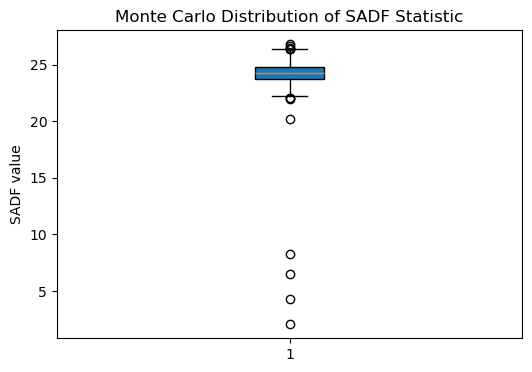

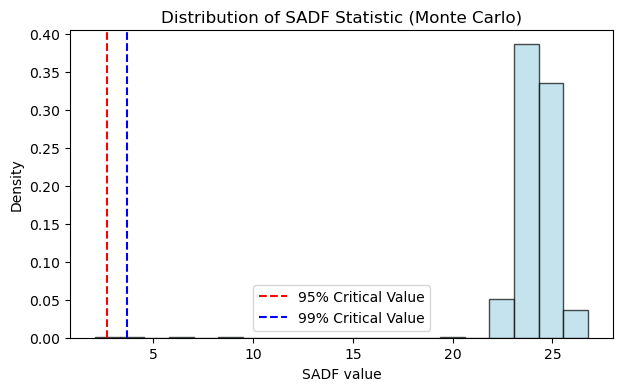

Empirical power at this setting: 1.0


In [13]:
delta = 0.02
""" Run Experiment """
sadf_list = []
B = 2000
for i in range(B):
    innov = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
    sadf_val = mf.run_sadf_bubble_check_2( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
    sadf_list.append(sadf_val)
    loading_bar(i + 1, B)

sadf_array = np.array(sadf_list)
print("\n")
print("Mean SADF:", np.round(np.mean(sadf_array), 3))
print("Median SADF:", np.round(np.median(sadf_array), 3))
print("Min SADF:", np.round(np.min(sadf_array), 3))
print("Max SADF:", np.round(np.max(sadf_array), 3))
print("Standard deviation:", np.round(np.std(sadf_array), 3))
print("25th percentile:", np.round(np.percentile(sadf_array, 25), 3))
print("75th percentile:", np.round(np.percentile(sadf_array, 75), 3))
print("95th percentile:", np.round(np.percentile(sadf_array, 95), 3))
print("99th percentile:", np.round(np.percentile(sadf_array, 99), 3))

plt.figure(figsize=(6,4))
plt.boxplot(sadf_array, vert=True, patch_artist=True)
plt.title("Monte Carlo Distribution of SADF Statistic")
plt.ylabel("SADF value")
plt.show()

plt.figure(figsize=(7,4))
plt.hist(sadf_array, bins=20, color='lightblue', edgecolor='k', alpha=0.7, density=True)
plt.axvline(crit_val_95, color='red', linestyle='--', label='95% Critical Value')
plt.axvline(crit_val_99, color='blue', linestyle='--', label='99% Critical Value')
plt.title("Distribution of SADF Statistic (Monte Carlo)")
plt.xlabel("SADF value")
plt.ylabel("Density")
plt.legend()
plt.show()

power = np.mean(sadf_array > crit_val_95)
print("Empirical power at this setting:", np.round(power, 3))

mean_val   = np.round(np.mean(sadf_array), 3)
median_val = np.round(np.median(sadf_array), 3)
min_val    = np.round(np.min(sadf_array), 3)
max_val    = np.round(np.max(sadf_array), 3)
std_val    = np.round(np.std(sadf_array), 3)
p25_val    = np.round(np.percentile(sadf_array, 25), 3)
p75_val    = np.round(np.percentile(sadf_array, 75), 3)
p95_val    = np.round(np.percentile(sadf_array, 95), 3)
p99_val    = np.round(np.percentile(sadf_array, 99), 3)

SADF_mean_list.append(mean_val)
SADF_median_list.append(median_val)
SADF_min_list.append(min_val)
SADF_max_list.append(max_val)
SADF_std_list.append(std_val)
SADF_p25_list.append(p25_val)
SADF_p75_list.append(p75_val)
SADF_p95_list.append(p95_val)
SADF_p99_list.append(p99_val)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
delta_list.append(delta)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)
power_list.append(power)

## Negative

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

Mean SADF: 14.848
Median SADF: 16.719
Min SADF: -2.327
Max SADF: 24.955
Standard deviation: 6.599
25th percentile: 10.136
75th percentile: 20.281
95th percentile: 22.664
99th percentile: 23.584


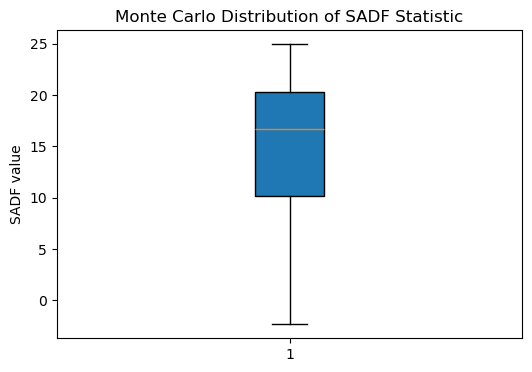

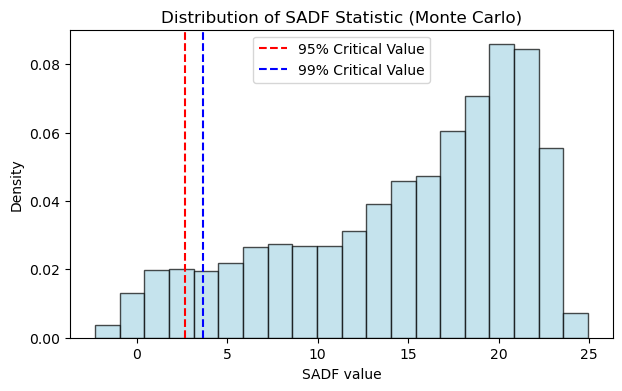

Empirical power at this setting: 0.93


In [15]:
delta = 0.008
""" Run Experiment """
sadf_list = []
B = 2000
for i in range(B):
    innov = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
    sadf_val = mf.run_sadf_bubble_check_2( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
    sadf_list.append(sadf_val)
    loading_bar(i + 1, B)

sadf_array = np.array(sadf_list)
print("\n")
print("Mean SADF:", np.round(np.mean(sadf_array), 3))
print("Median SADF:", np.round(np.median(sadf_array), 3))
print("Min SADF:", np.round(np.min(sadf_array), 3))
print("Max SADF:", np.round(np.max(sadf_array), 3))
print("Standard deviation:", np.round(np.std(sadf_array), 3))
print("25th percentile:", np.round(np.percentile(sadf_array, 25), 3))
print("75th percentile:", np.round(np.percentile(sadf_array, 75), 3))
print("95th percentile:", np.round(np.percentile(sadf_array, 95), 3))
print("99th percentile:", np.round(np.percentile(sadf_array, 99), 3))

plt.figure(figsize=(6,4))
plt.boxplot(sadf_array, vert=True, patch_artist=True)
plt.title("Monte Carlo Distribution of SADF Statistic")
plt.ylabel("SADF value")
plt.show()

plt.figure(figsize=(7,4))
plt.hist(sadf_array, bins=20, color='lightblue', edgecolor='k', alpha=0.7, density=True)
plt.axvline(crit_val_95, color='red', linestyle='--', label='95% Critical Value')
plt.axvline(crit_val_99, color='blue', linestyle='--', label='99% Critical Value')
plt.title("Distribution of SADF Statistic (Monte Carlo)")
plt.xlabel("SADF value")
plt.ylabel("Density")
plt.legend()
plt.show()

power = np.mean(sadf_array > crit_val_95)
print("Empirical power at this setting:", np.round(power, 3))

mean_val   = np.round(np.mean(sadf_array), 3)
median_val = np.round(np.median(sadf_array), 3)
min_val    = np.round(np.min(sadf_array), 3)
max_val    = np.round(np.max(sadf_array), 3)
std_val    = np.round(np.std(sadf_array), 3)
p25_val    = np.round(np.percentile(sadf_array, 25), 3)
p75_val    = np.round(np.percentile(sadf_array, 75), 3)
p95_val    = np.round(np.percentile(sadf_array, 95), 3)
p99_val    = np.round(np.percentile(sadf_array, 99), 3)

SADF_mean_list.append(mean_val)
SADF_median_list.append(median_val)
SADF_min_list.append(min_val)
SADF_max_list.append(max_val)
SADF_std_list.append(std_val)
SADF_p25_list.append(p25_val)
SADF_p75_list.append(p75_val)
SADF_p95_list.append(p95_val)
SADF_p99_list.append(p99_val)
delta_list.append(delta)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)
power_list.append(power)

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

Mean SADF: 12.944
Median SADF: 14.295
Min SADF: -2.72
Max SADF: 24.007
Standard deviation: 6.531
25th percentile: 7.911
75th percentile: 18.471
95th percentile: 21.532
99th percentile: 22.713


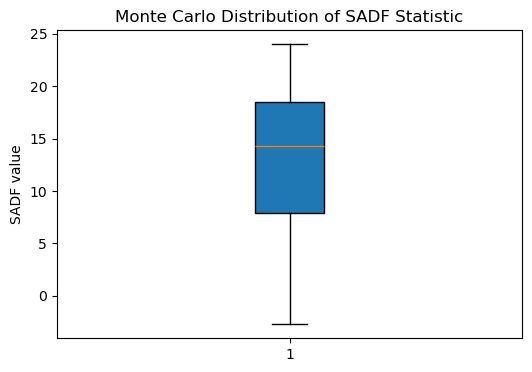

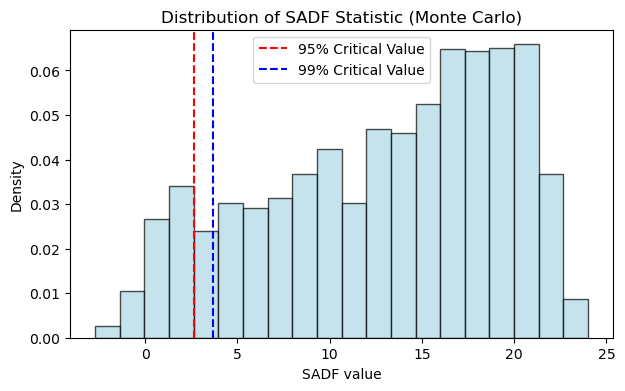

Empirical power at this setting: 0.901


In [16]:
delta = 0.0075
""" Run Experiment """
sadf_list = []
B = 2000
for i in range(B):
    innov = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
    sadf_val = mf.run_sadf_bubble_check_2( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
    sadf_list.append(sadf_val)
    loading_bar(i + 1, B)

sadf_array = np.array(sadf_list)
print("\n")
print("Mean SADF:", np.round(np.mean(sadf_array), 3))
print("Median SADF:", np.round(np.median(sadf_array), 3))
print("Min SADF:", np.round(np.min(sadf_array), 3))
print("Max SADF:", np.round(np.max(sadf_array), 3))
print("Standard deviation:", np.round(np.std(sadf_array), 3))
print("25th percentile:", np.round(np.percentile(sadf_array, 25), 3))
print("75th percentile:", np.round(np.percentile(sadf_array, 75), 3))
print("95th percentile:", np.round(np.percentile(sadf_array, 95), 3))
print("99th percentile:", np.round(np.percentile(sadf_array, 99), 3))

plt.figure(figsize=(6,4))
plt.boxplot(sadf_array, vert=True, patch_artist=True)
plt.title("Monte Carlo Distribution of SADF Statistic")
plt.ylabel("SADF value")
plt.show()

plt.figure(figsize=(7,4))
plt.hist(sadf_array, bins=20, color='lightblue', edgecolor='k', alpha=0.7, density=True)
plt.axvline(crit_val_95, color='red', linestyle='--', label='95% Critical Value')
plt.axvline(crit_val_99, color='blue', linestyle='--', label='99% Critical Value')
plt.title("Distribution of SADF Statistic (Monte Carlo)")
plt.xlabel("SADF value")
plt.ylabel("Density")
plt.legend()
plt.show()

power = np.mean(sadf_array > crit_val_95)
print("Empirical power at this setting:", np.round(power, 3))

mean_val   = np.round(np.mean(sadf_array), 3)
median_val = np.round(np.median(sadf_array), 3)
min_val    = np.round(np.min(sadf_array), 3)
max_val    = np.round(np.max(sadf_array), 3)
std_val    = np.round(np.std(sadf_array), 3)
p25_val    = np.round(np.percentile(sadf_array, 25), 3)
p75_val    = np.round(np.percentile(sadf_array, 75), 3)
p95_val    = np.round(np.percentile(sadf_array, 95), 3)
p99_val    = np.round(np.percentile(sadf_array, 99), 3)

SADF_mean_list.append(mean_val)
SADF_median_list.append(median_val)
SADF_min_list.append(min_val)
delta_list.append(delta)
SADF_max_list.append(max_val)
SADF_std_list.append(std_val)
SADF_p25_list.append(p25_val)
SADF_p75_list.append(p75_val)
SADF_p95_list.append(p95_val)
SADF_p99_list.append(p99_val)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)
power_list.append(power)

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

Mean SADF: 11.134
Median SADF: 11.849
Min SADF: -3.041
Max SADF: 23.366
Standard deviation: 6.179
25th percentile: 6.093
75th percentile: 16.304
95th percentile: 19.994
99th percentile: 21.647


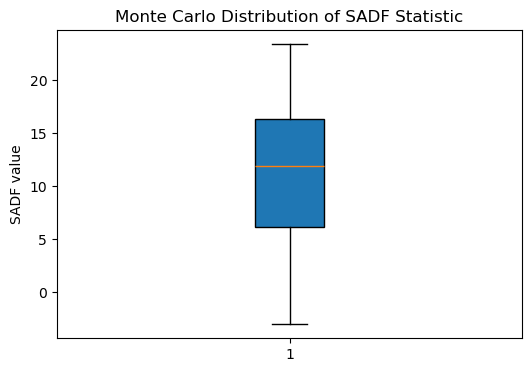

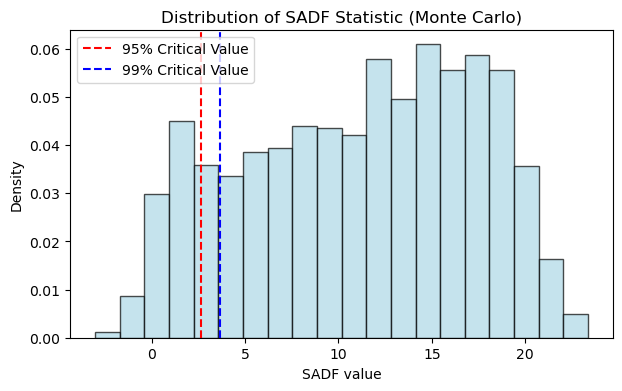

Empirical power at this setting: 0.875


In [17]:
delta = 0.007
""" Run Experiment """
sadf_list = []
B = 2000
for i in range(B):
    innov = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
    sadf_val = mf.run_sadf_bubble_check_2( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
    sadf_list.append(sadf_val)
    loading_bar(i + 1, B)

sadf_array = np.array(sadf_list)
print("\n")
print("Mean SADF:", np.round(np.mean(sadf_array), 3))
print("Median SADF:", np.round(np.median(sadf_array), 3))
print("Min SADF:", np.round(np.min(sadf_array), 3))
print("Max SADF:", np.round(np.max(sadf_array), 3))
print("Standard deviation:", np.round(np.std(sadf_array), 3))
print("25th percentile:", np.round(np.percentile(sadf_array, 25), 3))
print("75th percentile:", np.round(np.percentile(sadf_array, 75), 3))
print("95th percentile:", np.round(np.percentile(sadf_array, 95), 3))
print("99th percentile:", np.round(np.percentile(sadf_array, 99), 3))

plt.figure(figsize=(6,4))
plt.boxplot(sadf_array, vert=True, patch_artist=True)
plt.title("Monte Carlo Distribution of SADF Statistic")
plt.ylabel("SADF value")
plt.show()

plt.figure(figsize=(7,4))
plt.hist(sadf_array, bins=20, color='lightblue', edgecolor='k', alpha=0.7, density=True)
plt.axvline(crit_val_95, color='red', linestyle='--', label='95% Critical Value')
plt.axvline(crit_val_99, color='blue', linestyle='--', label='99% Critical Value')
plt.title("Distribution of SADF Statistic (Monte Carlo)")
plt.xlabel("SADF value")
plt.ylabel("Density")
plt.legend()
plt.show()

power = np.mean(sadf_array > crit_val_95)
print("Empirical power at this setting:", np.round(power, 3))

mean_val   = np.round(np.mean(sadf_array), 3)
median_val = np.round(np.median(sadf_array), 3)
min_val    = np.round(np.min(sadf_array), 3)
max_val    = np.round(np.max(sadf_array), 3)
std_val    = np.round(np.std(sadf_array), 3)
p25_val    = np.round(np.percentile(sadf_array, 25), 3)
p75_val    = np.round(np.percentile(sadf_array, 75), 3)
p95_val    = np.round(np.percentile(sadf_array, 95), 3)
p99_val    = np.round(np.percentile(sadf_array, 99), 3)

SADF_mean_list.append(mean_val)
SADF_median_list.append(median_val)
SADF_min_list.append(min_val)
SADF_max_list.append(max_val)
SADF_std_list.append(std_val)
SADF_p25_list.append(p25_val)
SADF_p75_list.append(p75_val)
delta_list.append(delta)
SADF_p95_list.append(p95_val)
SADF_p99_list.append(p99_val)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)
power_list.append(power)

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

Mean SADF: 4.533
Median SADF: 4.187
Min SADF: -2.772
Max SADF: 16.991
Standard deviation: 3.379
25th percentile: 1.805
75th percentile: 6.899
95th percentile: 10.501
99th percentile: 12.571


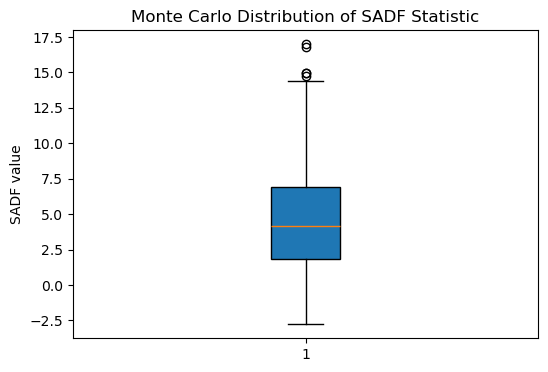

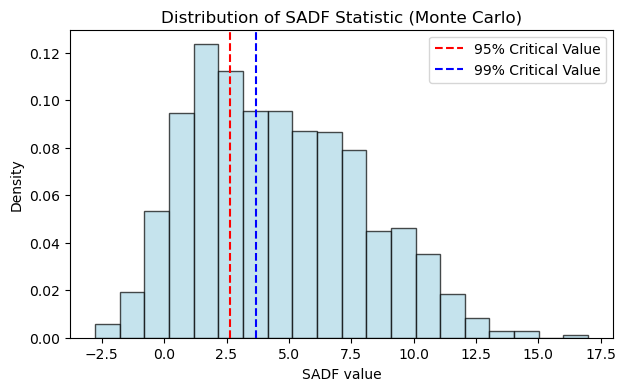

Empirical power at this setting: 0.651


In [18]:
delta = 0.005
""" Run Experiment """
sadf_list = []
B = 2000
for i in range(B):
    innov = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
    sadf_val = mf.run_sadf_bubble_check_2( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
    sadf_list.append(sadf_val)
    loading_bar(i + 1, B)

sadf_array = np.array(sadf_list)
print("\n")
print("Mean SADF:", np.round(np.mean(sadf_array), 3))
print("Median SADF:", np.round(np.median(sadf_array), 3))
print("Min SADF:", np.round(np.min(sadf_array), 3))
print("Max SADF:", np.round(np.max(sadf_array), 3))
print("Standard deviation:", np.round(np.std(sadf_array), 3))
print("25th percentile:", np.round(np.percentile(sadf_array, 25), 3))
print("75th percentile:", np.round(np.percentile(sadf_array, 75), 3))
print("95th percentile:", np.round(np.percentile(sadf_array, 95), 3))
print("99th percentile:", np.round(np.percentile(sadf_array, 99), 3))

plt.figure(figsize=(6,4))
plt.boxplot(sadf_array, vert=True, patch_artist=True)
plt.title("Monte Carlo Distribution of SADF Statistic")
plt.ylabel("SADF value")
plt.show()

plt.figure(figsize=(7,4))
plt.hist(sadf_array, bins=20, color='lightblue', edgecolor='k', alpha=0.7, density=True)
plt.axvline(crit_val_95, color='red', linestyle='--', label='95% Critical Value')
plt.axvline(crit_val_99, color='blue', linestyle='--', label='99% Critical Value')
plt.title("Distribution of SADF Statistic (Monte Carlo)")
plt.xlabel("SADF value")
plt.ylabel("Density")
plt.legend()
plt.show()

power = np.mean(sadf_array > crit_val_95)
print("Empirical power at this setting:", np.round(power, 3))

mean_val   = np.round(np.mean(sadf_array), 3)
median_val = np.round(np.median(sadf_array), 3)
min_val    = np.round(np.min(sadf_array), 3)
max_val    = np.round(np.max(sadf_array), 3)
std_val    = np.round(np.std(sadf_array), 3)
p25_val    = np.round(np.percentile(sadf_array, 25), 3)
p75_val    = np.round(np.percentile(sadf_array, 75), 3)
p95_val    = np.round(np.percentile(sadf_array, 95), 3)
p99_val    = np.round(np.percentile(sadf_array, 99), 3)

SADF_mean_list.append(mean_val)
SADF_median_list.append(median_val)
SADF_min_list.append(min_val)
SADF_max_list.append(max_val)
SADF_std_list.append(std_val)
SADF_p25_list.append(p25_val)
SADF_p75_list.append(p75_val)
SADF_p95_list.append(p95_val)
SADF_p99_list.append(p99_val)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
crit_95_list.append(crit_val_95)
delta_list.append(delta)
crit_99_list.append(crit_val_99)
power_list.append(power)

In [9]:
crit_val_95 =  2.653936
crit_val_99 = 3.667

Running Simulations: |██████████████████████████████| 100% --- 2000/2000

Mean SADF: 0.811
Median SADF: 0.843
Min SADF: -4.069
Max SADF: 5.224
Standard deviation: 1.305
25th percentile: -0.009
75th percentile: 1.692
95th percentile: 2.848
99th percentile: 3.83


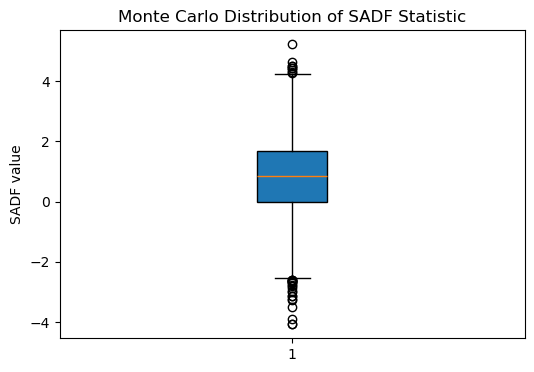

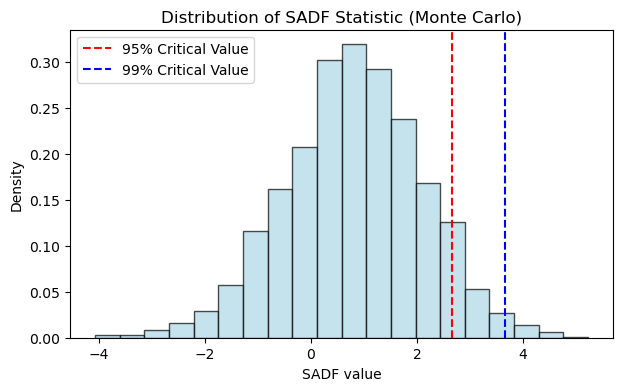

Empirical power at this setting: 0.072


In [11]:
delta = 0.001
""" Run Experiment """
sadf_list = []
B = 2000
for i in range(B):
    innov = np.random.normal(0, 1, size=(T - int(T * coint_frac), int(num_of_rw * num_series))) #constant
    sadf_val = mf.run_sadf_bubble_check_2( delta, T, coint_frac, num_of_rw,  common_fac, multipliers, innov, e, crit_val_95, crit_val_99, num_series)
    sadf_list.append(sadf_val)
    loading_bar(i + 1, B)

sadf_array = np.array(sadf_list)
print("\n")
print("Mean SADF:", np.round(np.mean(sadf_array), 3))
print("Median SADF:", np.round(np.median(sadf_array), 3))
print("Min SADF:", np.round(np.min(sadf_array), 3))
print("Max SADF:", np.round(np.max(sadf_array), 3))
print("Standard deviation:", np.round(np.std(sadf_array), 3))
print("25th percentile:", np.round(np.percentile(sadf_array, 25), 3))
print("75th percentile:", np.round(np.percentile(sadf_array, 75), 3))
print("95th percentile:", np.round(np.percentile(sadf_array, 95), 3))
print("99th percentile:", np.round(np.percentile(sadf_array, 99), 3))

plt.figure(figsize=(6,4))
plt.boxplot(sadf_array, vert=True, patch_artist=True)
plt.title("Monte Carlo Distribution of SADF Statistic")
plt.ylabel("SADF value")
plt.show()

plt.figure(figsize=(7,4))
plt.hist(sadf_array, bins=20, color='lightblue', edgecolor='k', alpha=0.7, density=True)
plt.axvline(crit_val_95, color='red', linestyle='--', label='95% Critical Value')
plt.axvline(crit_val_99, color='blue', linestyle='--', label='99% Critical Value')
plt.title("Distribution of SADF Statistic (Monte Carlo)")
plt.xlabel("SADF value")
plt.ylabel("Density")
plt.legend()
plt.show()

power = np.mean(sadf_array > crit_val_95)
print("Empirical power at this setting:", np.round(power, 3))

mean_val   = np.round(np.mean(sadf_array), 3)
median_val = np.round(np.median(sadf_array), 3)
min_val    = np.round(np.min(sadf_array), 3)
max_val    = np.round(np.max(sadf_array), 3)
std_val    = np.round(np.std(sadf_array), 3)
p25_val    = np.round(np.percentile(sadf_array, 25), 3)
p75_val    = np.round(np.percentile(sadf_array, 75), 3)
p95_val    = np.round(np.percentile(sadf_array, 95), 3)
p99_val    = np.round(np.percentile(sadf_array, 99), 3)

SADF_mean_list.append(mean_val)
SADF_median_list.append(median_val)
SADF_min_list.append(min_val)
SADF_max_list.append(max_val)
SADF_std_list.append(std_val)
delta_list.append(delta)
SADF_p25_list.append(p25_val)
SADF_p75_list.append(p75_val)
SADF_p95_list.append(p95_val)
SADF_p99_list.append(p99_val)
T_list.append(T)
num_series_list.append(num_series)
coint_frac_list.append(coint_frac)
num_of_rw_list.append(num_of_rw)
crit_95_list.append(crit_val_95)
crit_99_list.append(crit_val_99)
power_list.append(power)

In [ ]:
df = pd.DataFrame({
    'T':                 T_list,
    'num_series':        num_series_list,
    'coint_frac':        coint_frac_list,
    'num_of_rw':         num_of_rw_list,
    'SADF_mean':         SADF_mean_list,
    'SADF_median':       SADF_median_list,
    'SADF_min':          SADF_min_list,
    'SADF_max':          SADF_max_list,
    'SADF_std':          SADF_std_list,
    'SADF_p25':          SADF_p25_list,
    'SADF_p75':          SADF_p75_list,
    'SADF_p95':          SADF_p95_list,
    'SADF_p99':          SADF_p99_list,
    'crit_95':           crit_95_list,
    'crit_99':           crit_99_list,
    'power':             power_list,
    'delta': delta_list
})

output_filename = f"{num_series}_Series_Delta_Experiment_{T}.csv"
df.to_csv(output_filename, index=False)
print(f"Results written to {output_filename}")

import sounddevice as sd
fs = 50100  # sample rate
t = np.linspace(0, 2, fs, False)             # 1 second
sd.play(np.sin(2 * np.pi * 440 * t) * 0.5, fs)  # 440 Hz at half volume
sd.wait()
np.random.seed(22)